# Regresja liniowa: nadmierne dopasowanie i regularyzacja

W tym zadaniu zobaczymy, jak modele liniowe przetrenowują się, zrozumiemy, dlaczego tak się dzieje i dowiemy się, jak diagnozować i kontrolować przetrenowanie.

We wszystkich komórkach, w których znajduje się komentarz z instrukcjami, należy napisać kod wykonujący te instrukcje. Pozostałe komórki z kodem (bez komentarzy) należy po prostu wykonać. Ponadto zadanie wymaga udzielenia odpowiedzi na pytania; odpowiedzi należy wpisać po wyróżnionym słowie "__Answer:__".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Będziemy pracować ze zbiorem danych "bikes_rent.csv", który zawiera informacje kalendarzowe i warunki pogodowe, które charakteryzują zautomatyzowane punkty wypożyczania rowerów, a także liczbę wypożyczeń w danym dniu. Te ostatnie będziemy przewidywać; w ten sposób rozwiążemy problem regresji.

## Zapoznanie się z danymi

## Zadanie 1

Załaduj zestaw danych za pomocą funkcji __pandas.read_csv__ do zmiennej __df__. Wydrukuj pierwsze 5 wierszy, aby upewnić się, że dane zostały poprawnie odczytane:

In [2]:
df = pd.read_csv("bikes_rent.csv")
print(df[0:5])

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Dla każdego dnia roboczego znane są następujące atrybuty:
* _season_: 1 - wiosna, 2 - lato, 3 - jesień, 4 - zima.
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: od 1 do 12.
* _holiday_: 0 - brak wakacji, 1 - wakacje.
* _weekday_: 0 do 6
* _workingday_: 0 oznacza dzień wolny od pracy, 1 oznacza dzień roboczy.
* _weathersit_: ocena korzystnej pogody od 1 (czysty, pogodny dzień) do 4 (ulewny deszcz, mgła)
* _temp_: temperatura w stopniach Celsjusza.
* _atemp_: temperatura w stopniach Celsjusza.
* _hum_: wilgotność
* _windspeed(mph)_: prędkość wiatru w milach na godzinę.
* _windspeed(ms)_: prędkość wiatru w metrach na sekundę.
* _cnt_: liczba wypożyczonych rowerów (jest to atrybut docelowy, będziemy go przewidywać).

Mamy więc cechy rzeczywiste, binarne i nominalne (porządkowe), a wszystkie z nich można traktować jako cechy rzeczywiste. Atrybuty nominalne mogą być również traktowane jako rzeczywiste, ponieważ mają porządek. Zobaczmy na wykresach, jak cecha docelowa zależy od innych cech

Wykres zależności atrybutów od liczby przejazdów. Innymi słowy, należy zbudować 12 wykresów. Każdy z nich powinien pokazywać zależność kolejnego atrybutu od zmiennej **cnt**.

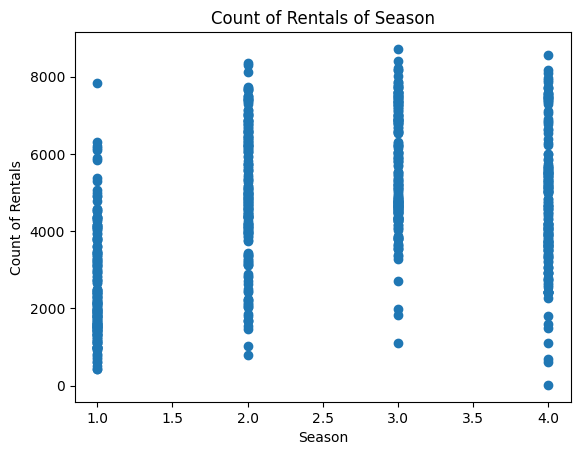

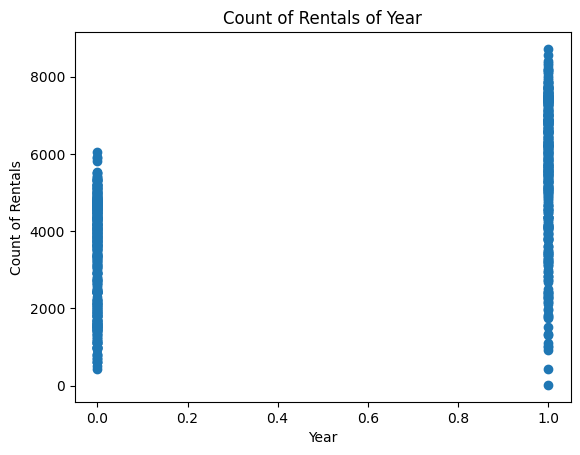

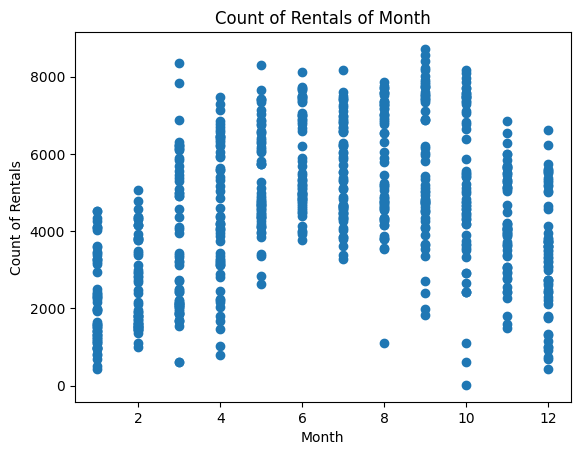

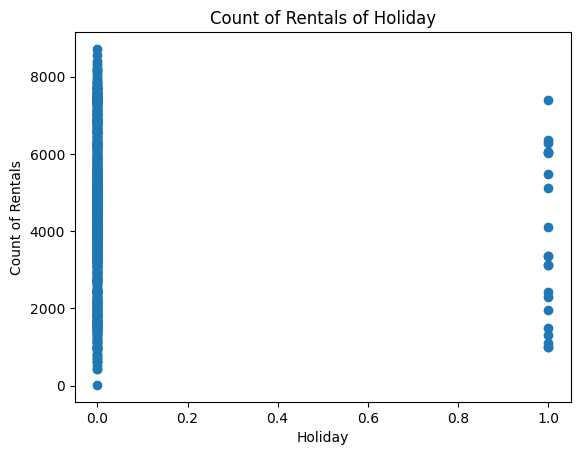

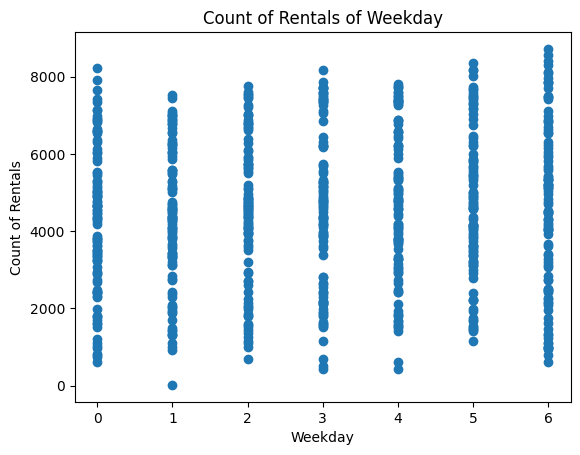

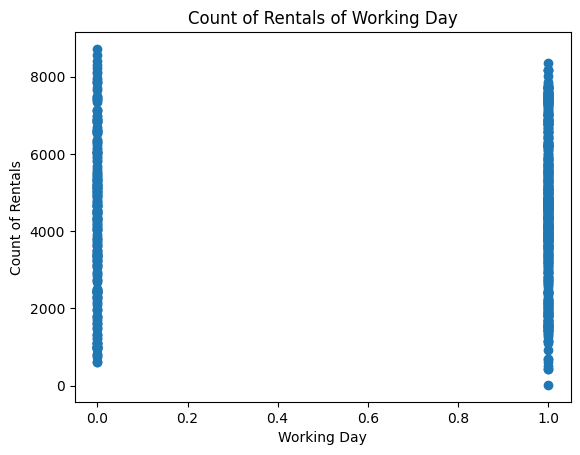

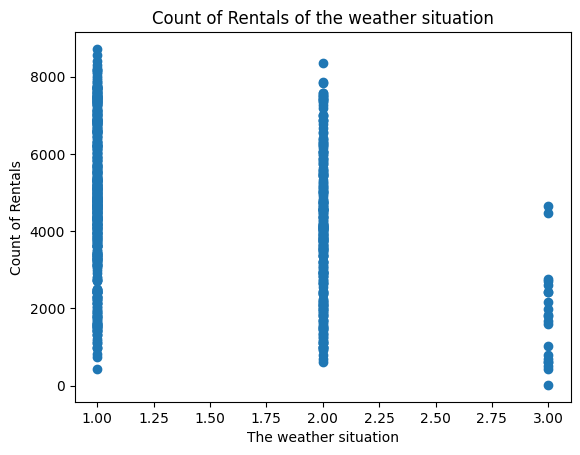

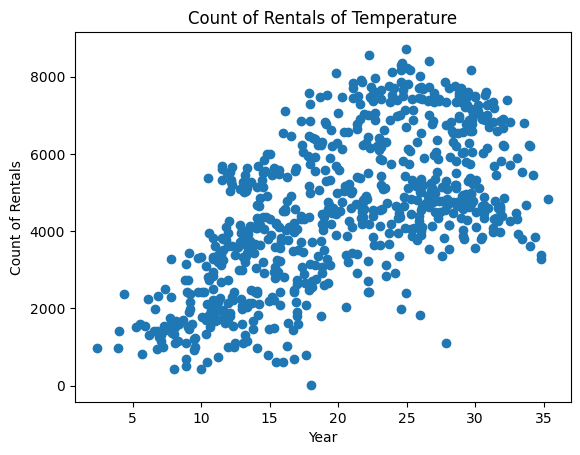

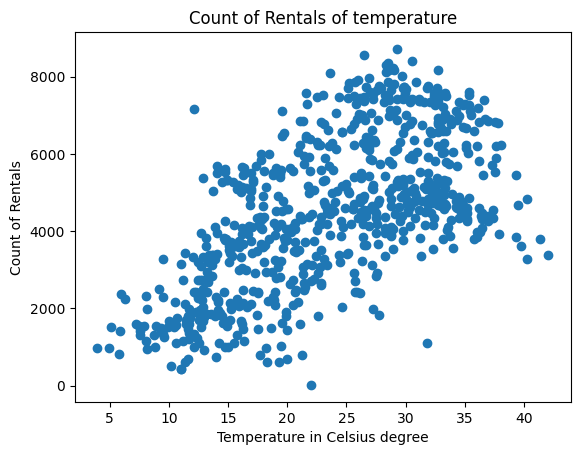

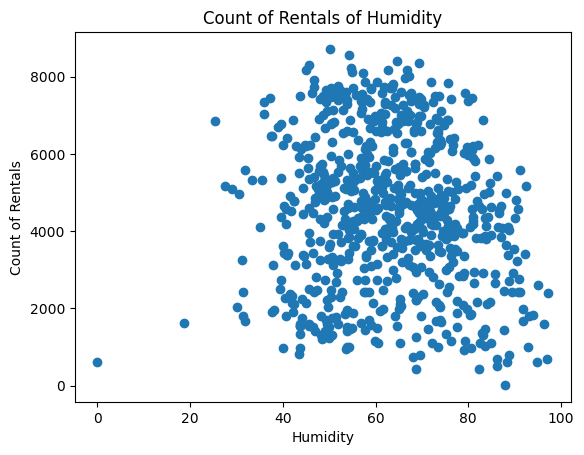

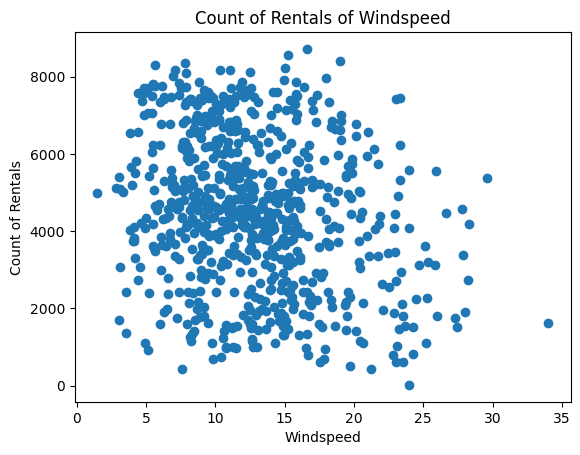

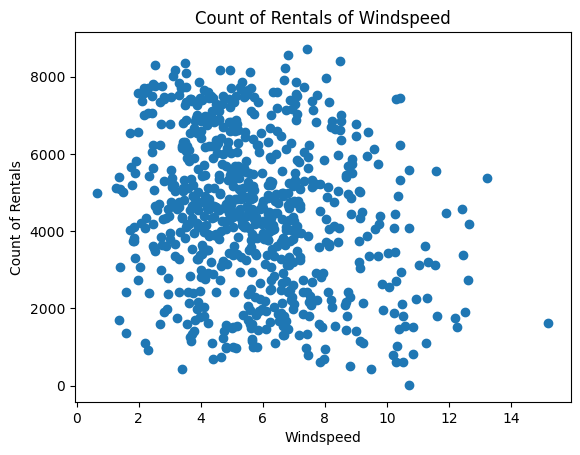

In [3]:
#depending on the season
season = plt.scatter(df["season"],df["cnt"])
plt.xlabel("Season")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Season")

plt.show()

#depending on the year
year = plt.scatter(df["yr"],df["cnt"])
plt.xlabel("Year")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Year")

plt.show()

#depending on the month
year = plt.scatter(df["mnth"],df["cnt"])
plt.xlabel("Month")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Month")

plt.show()

#depending on the holiday
year = plt.scatter(df["holiday"],df["cnt"])
plt.xlabel("Holiday")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Holiday")

plt.show()

#depending on the weekday
weekday = plt.scatter(df["weekday"],df["cnt"])
plt.xlabel("Weekday")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Weekday")

plt.show()

#depending on the working day
workingday = plt.scatter(df["workingday"],df["cnt"])
plt.xlabel("Working Day")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Working Day")

plt.show()

#depending on the weather situation
weathersit = plt.scatter(df["weathersit"],df["cnt"])
plt.xlabel("The weather situation")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of the weather situation")

plt.show()

#depending on the temperature
temp = plt.scatter(df["temp"],df["cnt"])
plt.xlabel("Year")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Temperature")

plt.show()

#depending on the temperature in Celsius
atemp = plt.scatter(df["atemp"], df["cnt"])
plt.xlabel("Temperature in Celsius degree")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of temperature")

plt.show()

#depending on the humidity
humd = plt.scatter(df["hum"],df["cnt"])
plt.xlabel("Humidity")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Humidity")

plt.show()

#depending on the windspeed
windspeed = plt.scatter(df["windspeed(mph)"],df["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Windspeed")

plt.show()

#depending on the windspeed
windspeed_ms = plt.scatter(df["windspeed(ms)"],df["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Count of Rentals")
plt.title("Count of Rentals of Windspeed")

plt.show()



__Pytania:__
1. Jaka jest natura zależności liczby wypożyczeń od miesiąca?
1. Podaj jedną lub dwie cechy, od których liczba wypożyczeń najprawdopodobniej zależy liniowo

## Zadanie 2

Bardziej rygorystycznie oceńmy poziom zależności liniowej między cechami a zmienną docelową. Dobrą miarą zależności liniowej między dwoma wektorami jest korelacja Pearsona. Mieliśmy już z nią do czynienia wcześniej. Aby ją obliczyć w pandach, możemy skorzystać z metod dataframe: corr i corrwith.

Oblicz korelacje wszystkich cech oprócz ostatniej z ostatnią cechą za pomocą metody `corrwith`.

In [4]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])

print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64




```
# Wybrany format kodu
```

Istnieją cechy w próbce, które korelują z cechą docelową, co oznacza, że problem można rozwiązać za pomocą metod liniowych.

Z wykresów widzimy, że niektóre cechy są do siebie podobne. Obliczmy więc również korelacje między rzeczywistymi atrybutami.

## Zadanie 3

Oblicz korelacje parami między cechami temp, atemp, hum, windspeed(mph), windspeed(ms) i cnt
przy użyciu metody corr:

In [5]:
selected_columns = ["temp", "atemp", "windspeed(mph)", "windspeed(ms)", "hum","cnt"]
correlation_matrix = df[selected_columns].corr()

print(correlation_matrix)


                    temp     atemp  windspeed(mph)  windspeed(ms)       hum  \
temp            1.000000  0.991702       -0.157944      -0.157944  0.126963   
atemp           0.991702  1.000000       -0.183643      -0.183643  0.139988   
windspeed(mph) -0.157944 -0.183643        1.000000       1.000000 -0.248489   
windspeed(ms)  -0.157944 -0.183643        1.000000       1.000000 -0.248489   
hum             0.126963  0.139988       -0.248489      -0.248489  1.000000   
cnt             0.627494  0.631066       -0.234545      -0.234545 -0.100659   

                     cnt  
temp            0.627494  
atemp           0.631066  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
hum            -0.100659  
cnt             1.000000  


Na przekątnych, tak jak powinno być, znajdują się jednostki. Jednak w macierzy znajdują się jeszcze dwie pary silnie skorelowanych kolumn: temp i atemp (skorelowane z natury) oraz dwie prędkości wiatru (ponieważ jest to tylko tłumaczenie niektórych jednostek na inne). Dalej zobaczymy, że fakt ten negatywnie wpływa na uczenie modelu liniowego.

Na koniec przyjrzyjmy się średniej cech (metoda średniej), aby oszacować skalę cech i ułamek 1 w cechach binarnych.

In [6]:
mean_features = df[selected_columns].mean()
print(mean_features)

temp                20.310776
atemp               23.717699
windspeed(mph)      12.762576
windspeed(ms)        5.705220
hum                 62.789406
cnt               4504.348837
dtype: float64


## Zadanie 4

Wyznacz średnią cech

In [7]:
mean_features2 = df.mean()
print(mean_features2)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


Atrybuty mają różne skale, więc do dalszej pracy lepiej znormalizujemy macierz obiekt-atrybut.

### Problem pierwszy: cechy współliniowe

Tak więc w naszych danych jedna cecha duplikuje inną cechę i istnieją jeszcze dwie bardzo podobne cechy. Oczywiście moglibyśmy od razu usunąć duplikaty, ale zobaczmy, jak wyglądałby trening modelu, gdybyśmy nie zauważyli tego problemu.

Po pierwsze, wykonajmy skalowanie lub standaryzację cech: od każdej cechy odejmiemy jej średnią i podzielimy ją przez jej odchylenie standardowe. Można to zrobić za pomocą metody skalowania.

Ponadto musimy wymieszać próbkę do walidacji krzyżowej.

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Przetrenujmy regresję liniową na naszych danych i przyjrzyjmy się wagom cech.

In [10]:
from sklearn.linear_model import LinearRegression

## Zadanie 5

Utwórz obiekt regresora liniowego, wytrenuj go na wszystkich danych i wyprowadź wagi modelu (wagi są przechowywane w zmiennej `coef_` klasy regresora). Możesz wyprowadzić pary (nazwa funkcji, waga) za pomocą funkcji `zip` wbudowanej w język Python. Nazwy cech są przechowywane w zmiennej `df.columns`.


In [11]:
regressor = LinearRegression()

X = df.drop(columns = ["cnt"])
y = df["cnt"]

regressor.fit(X,y)
feature_weights = zip(df.columns[-1], regressor.coef_)

for feature, weight in feature_weights:
    print(f"{feature} : {weight}")

c : 514.2760541669044
n : 2043.9337750743266
t : -40.96465941088525


Widzimy, że wagi dla cech zależnych liniowo są modulo znacznie większe niż dla innych cech. Aby zrozumieć, dlaczego tak się dzieje, przypomnijmy wzór analityczny używany do obliczania wag modelu liniowego w metodzie najmniejszych kwadratów:

$$w = (X^TX)^{-1} X^T y$$.

Jeśli $X$ ma współliniowe (liniowo zależne) kolumny, macierz $X^TX$ staje się zdegenerowana, a wzór nie jest już poprawny. Im bardziej zależne są cechy, tym mniejszy jest wyznacznik tej macierzy i tym gorsze przybliżenie $Xw \approx y$. Sytuacja ta nazywana jest _problemem wieloliniowości_.

Nie stało się tak w przypadku pary (temp, atemp) nieco mniej skorelowanych zmiennych, ale w praktyce zawsze warto uważnie obserwować współczynniki pod kątem podobnych znaków.

Aby rozwiązać problem wieloliniowości, musimy użyć regularyzatora. Do optymalizowanej funkcji dodaje się $L_1$ lub $L_2$ normę wag pomnożoną przez współczynnik regularyzacji $\alpha$. W pierwszym przypadku metoda nazywana jest Lasso, a w drugim --- Ridge

### Zadanie 6
Spróbujmy wytrenować modele liniowe z regularyzacją $L_1$ i $L_2$, a następnie porównajmy ich wagi. Wytrenuj regresory Ridge i Lasso z domyślnymi parametrami i zobacz, że problem z wagami został rozwiązany.

Wytrenować model liniowy z $L_1$-regularizacją (klasa Lasso) i wyprowadzić wagi

In [12]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(X,y)
lasso_weights = zip(df.columns[:-1], lasso_regressor.coef_)
for feature, weight in lasso_weights:
    print(f"{feature}:{weight}")

season:506.5512786498084
yr:2036.231667697904
mnth:-38.0782702893218
holiday:-484.6519461865393
weekday:68.9383747913396
workingday:118.44759758668346
weathersit:-604.5667118927047
temp:51.363260585616096
atemp:69.91273749012215
hum:-10.352705204636596
windspeed(mph):-38.341067613108464
windspeed(ms):-0.0


Wytrenować model liniowy z $L_2$-regularizacją (klasa Ridge) i wyprowadzić wagi

In [13]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(X,y)
ridge_weights = zip(df.columns[:-1], ridge_regressor.coef_)
for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")

season: 507.80188185056625
yr: 2029.0890541970266
mnth: -38.47089727912216
holiday: -493.27801548382087
weekday: 69.11396965165945
workingday: 121.52442502929556
weathersit: -605.2055553731651
temp: 49.316767595991195
atemp: 71.7859872733424
hum: -10.383394500484398
windspeed(mph): -31.935501694137766
windspeed(ms): -14.276040264171069


### Zadanie 7

W przeciwieństwie do regularyzacji $L_2$, $L_1$ zeruje wagi dla niektórych cech. Zaobserwujmy, jak zmieniają się wagi wraz ze wzrostem współczynnika regularyzacji $\alpha$.

Dla każdej wartości współczynnika z `alphas`, wytrenuj regresor `Lasso` i zapisz wagi do listy `coefs_lasso`, a następnie wytrenuj `Ridge` i zapisz wagi do listy `coefs_ridge`. Przekonwertuj wynikowe listy na `np.array`.

In [14]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha = alpha)
    lasso_regressor.fit(X,y)
    coefs_lasso.append(lasso_regressor.coef_)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X,y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

print(f"Regressor_L1: {coefs_lasso}")
print(f"Regressor_L2: {coefs_ridge}")

Regressor_L1: [[ 506.55127865 2036.2316677   -38.07827029 -484.65194619   68.93837479
   118.44759759 -604.56671189   51.36326059   69.91273749  -10.3527052
   -38.34106761   -0.        ]
 [ 363.38298622 1818.17950113   -0.           -0.           55.24105548
     0.         -291.33521188   44.34993053   83.88557181  -18.81320743
   -43.35682101   -0.        ]
 [ 294.88974192 1604.19359695    9.74208093   -0.           37.4493754
     0.           -0.           37.46764176   95.93389064  -26.48659474
   -48.19495616   -0.        ]
 [ 188.43126588 1400.65605911   33.03502814   -0.           24.19007609
     0.           -0.           33.15169023  102.54337981  -26.88669007
   -47.85305889   -0.        ]
 [  81.95521364 1197.14314149   56.33124542   -0.           10.96345655
     0.           -0.           27.55035178  110.33369233  -27.29091458
   -47.46769509   -0.        ]
 [   0.          994.19323854   73.37527257   -0.            0.
     0.           -0.           21.70631423  117.

Przeanalizuj dynamikę wag w miarę zwiększania parametru regularyzacji:

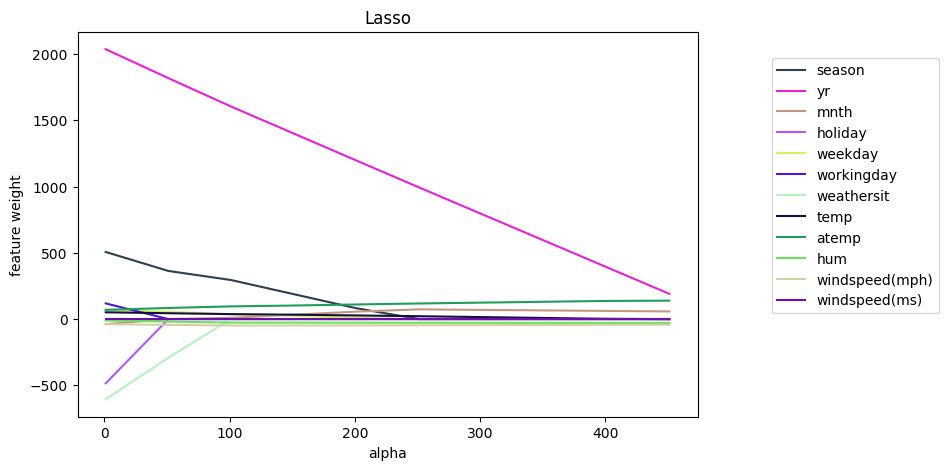

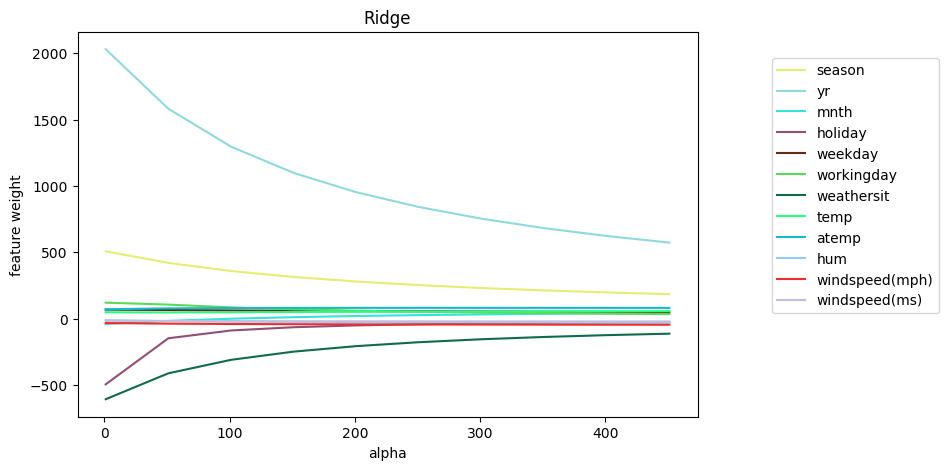

In [15]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Przeanalizuj wykresy i odpowiedz na poniższe pytania.

1. Który regularyzator (Ridge czy Lasso) bardziej agresywnie redukuje wagi dla tej samej wartości alfa?
2. Co dzieje się z wagami Lasso, jeśli wartość alfa jest bardzo duża? Wyjaśnij, dlaczego tak się dzieje.
3. Czy można argumentować, że `Lasso` eliminuje jedną z cech `prędkość wiatru` dla dowolnej wartości `alfa > 0`? A Ridge? Mówi się, że regularyzator wyklucza cechę, jeśli współczynnik dla niej jest mniejszy niż $10^{-3}$.
4. Który regularyzator jest odpowiedni do wybierania nieinformatywnych cech?

### Zadanie 8

Następnie będziemy pracować z `Lasso'.

Widzimy więc, że gdy zmieniamy alfa, model inaczej dopasowuje współczynniki cech. Musimy wybrać najlepszą wartość alfa.

W tym celu potrzebujemy przede wszystkim metryki jakości. Jako metryki użyjemy samej zoptymalizowanej funkcji najmniejszych kwadratów, tj. błędu średniokwadratowego.

Po drugie, musimy zrozumieć, na jakich danych obliczyć tę metrykę. Nie możemy wybrać "alfa" na podstawie wartości MSE na próbce treningowej, ponieważ wtedy nie możemy ocenić, w jaki sposób model będzie przewidywał na nowych danych. Jeśli wybierzemy jedną próbkę podzieloną między próbkę treningową i testową (nazywa się to wstrzymaniem), dostroimy się do konkretnych "nowych" danych i możemy ponownie przetrenować. Dlatego wykonamy kilka podziałów próbek, wypróbujemy różne wartości alfa dla każdej z nich, a następnie uśrednimy MSE. Wygodniej jest dokonać takich podziałów za pomocą walidacji krzyżowej, tj. podzielić próbkę na części $K$ i za każdym razem wziąć jedną z nich jako testową, a z pozostałych bloków utworzyć próbkę szkoleniową.

Przeprowadzenie walidacji krzyżowej dla regresji w sklearn jest dość proste: istnieje specjalny regresor do tego celu, __LassoCV__, który pobiera jako dane wejściowe listę alfa i dla każdego z nich oblicza MSE na walidacji krzyżowej. Po treningu (jeśli pozostawimy domyślny parametr cv=3), regresor będzie zawierał zmienną __mse\_path\___, macierz o rozmiarze len(alpha) x k, k = 3 (liczba bloków w walidacji krzyżowej), zawierającą wartości MSE na teście dla odpowiednich przebiegów. Ponadto zmienna alpha\_ będzie przechowywać wybraną wartość parametru regularyzacji, a coef\_ będzie tradycyjnie przechowywać wytrenowane wagi odpowiadające tej alpha_.

Należy pamiętać, że regresor może zmienić kolejność, w jakiej działa na alphas; lepiej jest użyć zmiennej regresora alphas_, aby dopasować ją do macierzy MSE.

Wytrenuj regresor `LassoCV` na wszystkich parametrach regularyzacji od alfa. Wykreśl linie _averaged_ over `MSE` jako funkcję `alpha` (w tym celu użyj funkcji `create_plot`).

Wyprowadź wybraną wartość `alpha`, jak również pary cecha-współczynnik dla wytrenowanego wektora współczynników.

In [16]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

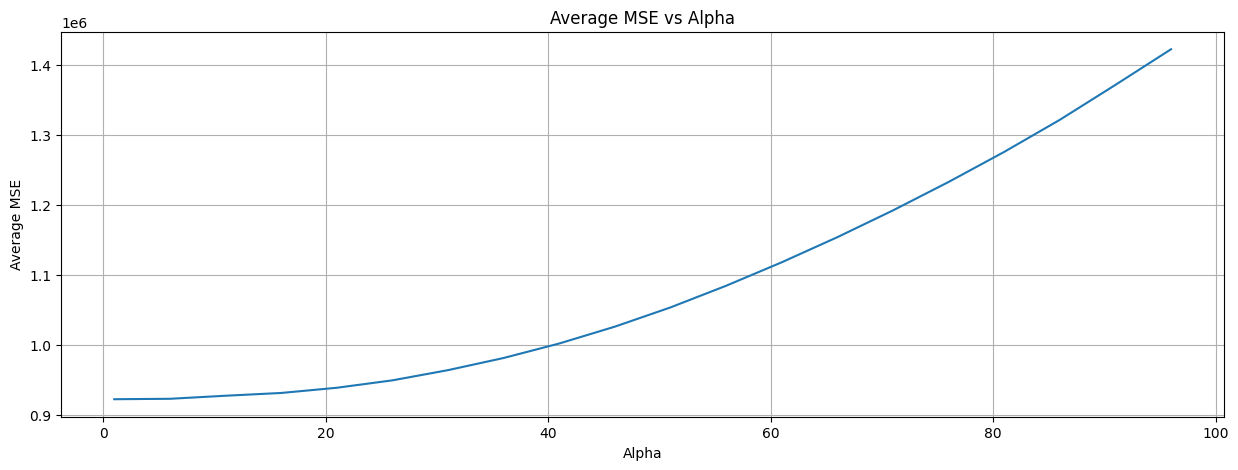

Wybrana wartość alpha: 1
season: 506.5512786498084
yr: 2036.231667697904
mnth: -38.0782702893218
holiday: -484.6519461865393
weekday: 68.9383747913396
workingday: 118.44759758668346
weathersit: -604.5667118927047
temp: 51.363260585616096
atemp: 69.91273749012215
hum: -10.352705204636596
windspeed(mph): -38.341067613108464
windspeed(ms): -0.0


In [27]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

lasso_cv_regressor = LassoCV(alphas=alphas, cv=3)
lasso_cv_regressor.fit(X, y)

mse_values = lasso_cv_regressor.mse_path_

average_mse = np.mean(mse_values, axis=1)

data_to_plot = list(zip(lasso_cv_regressor.alphas_, average_mse))

create_plot(data_to_plot, "Average MSE vs Alpha", "Alpha", "Average MSE")

selected_alpha = lasso_cv_regressor.alpha_
print("Wybrana wartość alpha:", selected_alpha)


feature_coef_pairs = list(zip(df.columns[:-1], lasso_cv_regressor.coef_))
for feature, coef in feature_coef_pairs:
    print(f"{feature}: {coef}")

Wybraliśmy więc pewien parametr regularyzacji. Zobaczmy, jaki parametr alfa wybralibyśmy, gdybyśmy podzielili próbkę tylko raz na trening i test, tj. rozważyli trajektorie MSE odpowiadające oddzielnym blokom próbki.

### Zadanie 9

Wyprowadź wartości `alpha` odpowiadające minimom `MSE` na każdej partycji (tj. według kolumn).
Wizualizacja kolumn `mse_path_` na trzech oddzielnych wykresach.


Wartości alpha odpowiadające minimom MSE na każdej partycji:
Partycja 1: 1
Partycja 2: 51
Partycja 3: 1


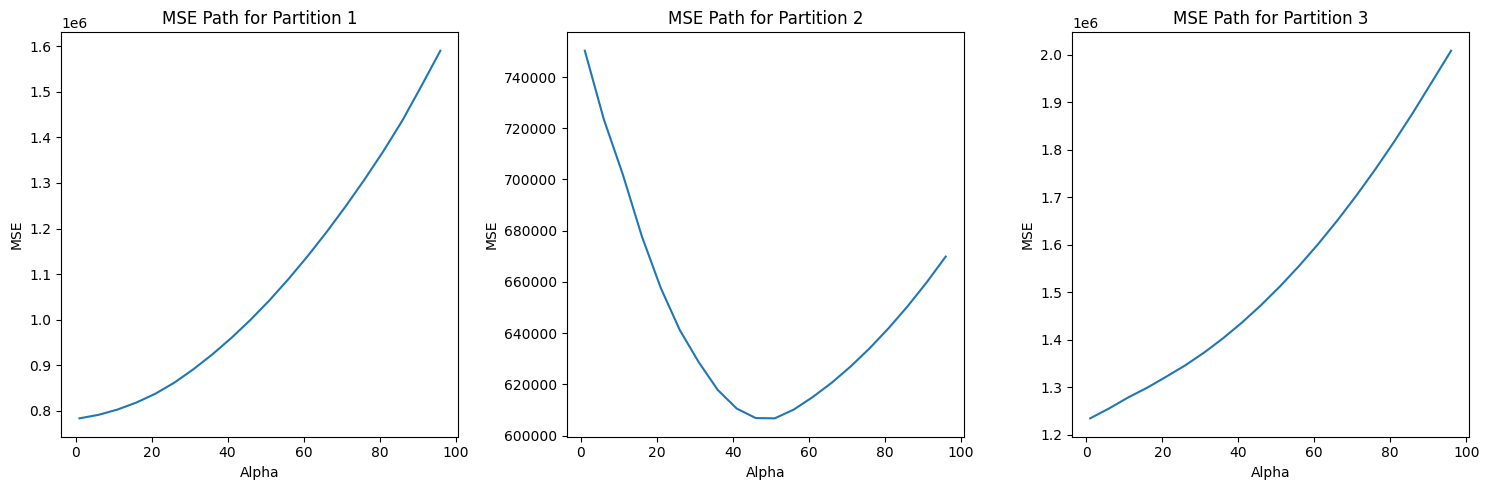

In [28]:
min_alpha_indices = np.argmin(mse_values, axis=0)
min_alphas = lasso_cv_regressor.alphas_[min_alpha_indices]

print("Wartości alpha odpowiadające minimom MSE na każdej partycji:")
for i, alpha in enumerate(min_alphas):
    print(f"Partycja {i+1}: {alpha}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.plot(lasso_cv_regressor.alphas_, mse_values[:, i])
    ax.set_title(f"MSE Path for Partition {i+1}")
    ax.set_xlabel("Alpha")
    ax.set_ylabel("MSE")

plt.tight_layout()
plt.show()


W każdej partycji optymalna wartość "alfa" jest inna i odpowiada dużemu MSE w innych partycjach. Okazuje się, że dostosowujemy się do konkretnych próbek treningowych i kontrolnych. Kiedy wybieramy `alpha` w walidacji krzyżowej, wybieramy coś "średniego", co da akceptowalną wartość metryki na różnych partycjach próbki.

### Zadanie 10

Na koniec, jak to zwykle bywa w analizie danych, zinterpretujmy wynik. Odpowiedz na następujące pytania.

#### Pytanie 1

W ostatnim wytrenowanym modelu wybierz 4 cechy o najwyższych (dodatnich) współczynnikach (i wypisz je), spójrz na wizualizacje zależności `cnt` od tych cech, które narysowaliśmy w bloku "Poznawanie danych". Czy na wykresach widać rosnącą liniową zależność `cnt` od tych cech? Czy logiczne jest twierdzenie (wynikające ze zdrowego rozsądku), że im większa wartość tych atrybutów, tym więcej osób będzie chciało wypożyczyć rowery?

__Odpowiedź:__

## season: 
Ten współczynnik ma wartość dodatnią, co sugeruje, że sezon ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość 506.55 oznacza, że w sezonie jest średnio 506.55 więcej wypożyczeń rowerów niż w sezonie bazowym.## year:
Współczynnik dla roku również jest dodatni, co wskazuje, że rok ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość 2036.23 oznacza, że w 2012 roku było średnio 2036.23 więcej wypożyczeń rowerów niż w 2011 roku.
## atemp:
 Ten współczynnik ma dużą dodatnią wartość, co sugeruje, że temperatura odczuwalna ma znaczący wpływ na liczbę wypożyczonych rowerów. Wartość 69.91 oznacza, że z każdym wzrostem temperatury odczuwalnej o jeden stopień Celsjusza, liczba wypożyczonych rowerów wzrasta średnio o 69.9.
## temp:
: Współczynnik dla temperatury również jest dodatni, co potwierdza, że temperatura ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość 51.36 oznacza, że z każdym wzrostem temperatury o jeden stopień Celsjusza, liczba wypożyczonych rowerów wzrasta średnio o 51.36.

#### Pytanie 2

Wybierz 3 cechy o największych współczynnikach modulo ujemnych (i wypisz je), spójrz na odpowiednie wizualizacje. Czy widoczna jest malejąca zależność liniowa? Czy logiczne jest stwierdzenie, że im większa wielkość tych cech, tym mniej osób będzie chciało wsiąść na rower?

__Odpowiedź:__

### weathersit: 
Ten współczynnik ma wartość ujemną, co sugeruje, że ocena warunków pogodowych ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość -604.57 oznacza, że w przypadku oceny złych warunków pogodowych (np. deszczu lub mgły), liczba wypożyczonych rowerów zmniejsza się średnio o 604.57.
### holiday: 
Współczynnik dla cechy święta również jest ujemny, co wskazuje, że obecność święta ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość -484.65 oznacza, że w dniach, gdy występuje święto, liczba wypożyczonych rowerów zmniejsza się średnio o 484.65.
### windspeed(mph): 
Ten współczynnik również ma wartość ujemną, co sugeruje, że prędkość wiatru ma istotny wpływ na liczbę wypożyczonych rowerów. Wartość -38.34 oznacza, że z każdym wzrostem prędkości wiatru o jedną milę na godzinę, liczba wypożyczonych rowerów zmniejsza się średnio o 38.34.

#### Pytanie 3

Wypisz znaki ze współczynnikami bliskimi zeru (< 1e-3). Jak myślisz, dlaczego model wykluczył je z modelu (spójrz ponownie na wykresy)? Czy to prawda, że nie mają one wpływu na popyt na rowery?

__Odpowiedź:__

### windspeed(ms): 
Współczynnik dla prędkości wiatru w metrach na sekundę wynosi 0.0, co oznacza, że model uznał tę cechę za nieistotną dla przewidywania liczby wypożyczonych rowerów. Może to wynikać z faktu, że ta cecha jest silnie skorelowana z inną cechą, np. prędkością wiatru w milach na godzinę, którą model uznał za bardziej istotną.
### hum (wilgotność): 
Współczynnik dla wilgotności również jest bliski zeru, co sugeruje, że model uznał tę cechę za mało istotną dla przewidywania liczby wypożyczonych rowerów. Może to wynikać z faktu, że wilgotność nie ma znaczącego wpływu na decyzje o wypożyczeniu rowerów w porównaniu do innych czynników, takich jak warunki pogodowe czy dzień tygodnia.
### mnth (miesiąc): 
Współczynnik dla miesiąca również jest bardzo bliski zeru. Model uznał, że ta cecha ma niewielki wpływ na liczbę wypożyczonych rowerów w porównaniu do innych czynników, takich jak sezon czy temperatura.

### Wnioski
Widzieliśmy więc, jak monitorować adekwatność modelu liniowego, jak wybierać cechy i jak prawidłowo wybrać współczynnik regularyzacji, jeśli to możliwe bez dostosowywania się do określonej części danych.

Warto zauważyć, że wygodnie jest wybrać tylko niewielką liczbę parametrów (1, 2, maksymalnie 3) za pomocą walidacji krzyżowej, ponieważ dla każdej dopuszczalnej kombinacji parametrów musimy trenować model kilka razy. Proces ten zajmuje dużo czasu, zwłaszcza jeśli musimy trenować na dużych ilościach danych.